In [1]:
# Getting all Dependencies ready
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import request
import time


# Import Openweathermapy function
import openweathermapy.core as owm


# Incorporated citipy to determine city based on latitude and longitude
# Import API key
from citipy import citipy
from config import api_key



#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

In [7]:
#List for holding latitude and longitude, also list to holding the cities name.
lat_lngs=[]
cities=[]
City_summary=[]
current_weather=[]
settings = {"units":"metric","appid":api_key}

#Create an ordenate pair of coordinates (latitude,longitude) randomly.
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)

#Identify the nearest city for each coodinate pair:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #If the generated city is unique, added to the cities list:
    if city not in cities:
        cities.append(city)
#print the number of cities generated
#print(cities)
#print(len(cities))

In [8]:
#source activate python data
#Once obtained the list of cities on the random related to the equator opening the openweather source
#to bring in the data available and select the country name, country id, country temperature, coordinates,
#humidity, cloudiness and windspeed.
city_summary=[]
settings = {"units":"metric","appid":api_key}

#For those cities that have no available data in openweather source skipp the country name

for city in cities:
    try:
        city_data = owm.get_current(city, **settings)
        city_summary.append(city_data)
    except:
        pass
# summary of parameters required in this problem   
summary = ["name","sys.country","id","coord.lon","coord.lat","main.temp_max","main.humidity","clouds.all", "wind.speed"]
#collection of data to form the city_summary
data=[response(*summary) for response in city_summary]
#creation of data frame
column_names= ["City","Country","Country ID","Longitude","Latitude","Temperature Max","Humidity","Cloudiness","Windspeed"]
city_summary= pd.DataFrame(data, columns=column_names)
city_summary

,City,Country,Country ID,Longitude,Latitude,Temperature Max,Humidity,Cloudiness,Windspeed
0,Vaini,IN,1273574,74.49,15.34,26.00,41,20,0.75
1,Shu,KZ,1519030,73.76,43.60,8.94,62,76,1.85
2,Broome,GB,2656067,1.45,52.47,2.22,93,80,1.50
3,Tuktoyaktuk,CA,6170031,-133.03,69.44,-21.00,76,40,4.10
4,Klaksvik,FO,2618795,-6.59,62.23,1.00,80,64,11.80
5,Alice Springs,AU,2077895,133.88,-23.70,28.00,14,0,6.20
6,La Palma,CO,3687505,-74.39,5.36,19.09,99,56,0.30
7,Thinadhoo,MV,1337610,72.93,0.53,28.74,100,92,4.10
8,Meadow Lake,CA,6071421,-108.44,54.13,-4.22,51,20,2.45
9,Bandarbeyla,SO,64814,50.81,9.49,25.84,100,92,1.40


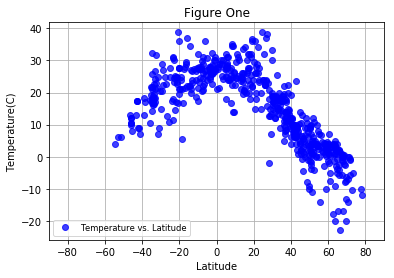

In [37]:
#Scatter plot for data temperature vs Latitide
fig, ax=plt.subplots()
ax.errorbar(city_summary["Latitude"], city_summary["Temperature Max"], yerr=None, xerr=None, fmt='o', color='b', alpha=0.75, label="Temperature vs. Latitude")
ax.set_xlim(-90,90)
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature(C)")
plt.title("Figure One")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.savefig("temperaturevslongitude.png")
plt.show()


In [ ]:
'''
We can observe in Figure One that those countries with a latitude 0 as Equator has the highest temperatures
as expected in a tropical region in the planet, lowering temperatures as the countries are far from the equatorial
line.
'''

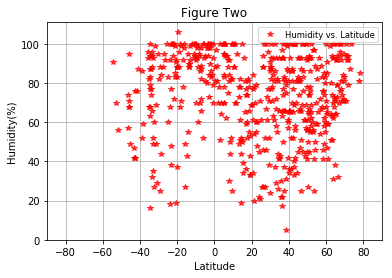

In [38]:
fig, ax=plt.subplots()
ax.errorbar(city_summary["Latitude"], city_summary["Humidity"], yerr=None, xerr=None, fmt='*', color='r', alpha=0.75, label="Humidity vs. Latitude")
ax.set_xlim(-90,90)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")
plt.title("Figure Two")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.savefig("humidityvslongitude.png")
plt.show()


In [ ]:
'''
In Figure Two we observe that the humidity is reducing as moving away from the equatorial line, but is increasing
as we move to the poles of the planet
'''

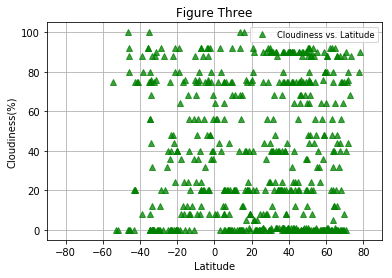

In [39]:
fig, ax=plt.subplots()
ax.errorbar(city_summary["Latitude"], city_summary["Cloudiness"], yerr=None, xerr=None, fmt='^', color='g', alpha=0.75, label="Cloudiness vs. Latitude")
ax.set_xlim(-90,90)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness(%)")
plt.title("Figure Three")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.savefig("cloudinessvslongitude.png")
plt.show()


In [ ]:
'''
Cloudiness is disperse accross the planet as more homogeneous results, but with an larger condensation in the north
hemisphere of the planet.
'''

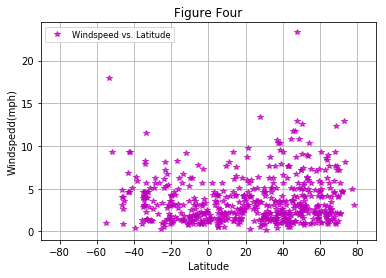

In [40]:
fig, ax=plt.subplots()
ax.errorbar(city_summary["Latitude"], city_summary["Windspeed"], yerr=None, xerr=None, fmt='*', color='m', alpha=0.75, label="Windspeed vs. Latitude")
ax.set_xlim(-90,90)
ax.set_xlabel("Latitude")
ax.set_ylabel("Windspedd(mph)")
plt.title("Figure Four")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.savefig("windspeedvslongitude.png")
plt.show()


In [ ]:
'''
In Figure Four, stronger winds (10 to 15 mph) are in the north hemisphere. The most of the windspeed in this
scatter plot are winds 0 to 10 miles per hour with a density in the latitud 40 to 60 with winds between 10 to
15 mph. These winds are not representing tropical and huracane winds.
'''

In [36]:
city_summary.to_dense().to_csv("cityfile.csv", index=False, sep=',', encoding='utf-8')